# Machine Learning (laboratory instruction)
## Classification metrics

### Submission

<u>Submission:</u>

Compress all files into **single zip** archive and submit via Wikamp. See below the content of the archive (replace the `name` and `surname` with proper values):
```
📂 name.surname.zip
+-- 📜 05-Multiclass classification.ipynb
```

<u>Grades</u>

| Percentage of all points | mark |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Penalties</u>

* `mark - 0.5` if tasks are submitted after laboratory (but less than 7 days); 
* `mark - 1` if tasks are submitted after one week (>=7 days but < 14 days);
* `mark - 1.5` if tasks are submitted later than two weeks (>=14 days).

<u>Warning:</u>

It is NOT allowed to share your .ipynb file with other students nor Internet. All students should download the exercise files directly from WIKAMP. Group work is considered as plagiarism.

<u>Plagiarism Disclaimer:</u>

I hereby declare that this exercise is my own and autonomous work. I am aware of the consequences and I am familiar with the university regulations.

### The goal.

Multi-class classification.

In previous laboratory you made a binary classifier. Such classifier assigns one of two labels to samples. In many machine learning applications there is a need to classify samples into more than two groups. This kind of classification is called multi-class classification.

### Task 0. Read the data.

Read the data from file `animals.npz`.
It is a data read from 20 sensors attached to the animal head. The sensors were put on multiple animals, and data has been collected and annotated.

**Tip**: You can use below code to read the data:

```python
import sklearn.datasets
import numpy as np
from tqdm import tqdm

with open('animals.npz', 'rb') as f:
    data = np.load(f)
    x_train, x_test, y_train, y_test, classes = data['x_train'], data['x_test'], data['y_train'], data['y_test'], data['classes']
```
```



In [1]:
import sklearn.datasets
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('animals.npz', 'rb') as f:
    data = np.load(f)
    x_train, x_test, y_train, y_test, classes = data['x_train'], data['x_test'], data['y_train'], data['y_test'], data['classes']

FileNotFoundError: [Errno 2] No such file or directory: 'animals.npz'


### Task 1. Data preprocessing - one-hot encoding.
To perform multi-class classification we need to prepare the data. We are about to predict the probability that particular sample belongs to one of $k$ classes. In this case, we expect that the result contains $k$ numbers where each tells the probability that the sample belongs to such class. Perfectly, if the sample belongs to the class the model returns 1 and zeros for other classes.

Before we start training the data should be prepared properly. For this case implement one-hot encoding function that will perform the below operation:

$$
\begin{align}
z_{i=0 \cdots k-1}(x) = \begin{cases}
1&\text{if $x=i$}\\
0&\text{if otherwise}\\
\end{cases}
\end{align}
$$

, where $k$ is the number of classes, $z$ if the one-hot vector and x if the number (index) of class.

Example ($k=6$):

| x     | z           |
| :---- |       ---:  |
| 2     | 0 0 1 0 0 0 |
| 5     | 0 0 0 0 0 1 |
| 1     | 0 1 0 0 0 0 |
| 0     | 1 0 0 0 0 0 |

*Note: it is worth to add bias feature at this point.*

In [2]:
def one_hot_encoding(label, class_n) :
    output = np.zeros( (len(label), class_n) )
    
    for _ in range(len(label)) :
        output[_][label[_]] = 1
    
    return output

In [3]:
y_train = one_hot_encoding(y_train, len(classes))
y_test = one_hot_encoding(y_test, len(classes))
print(y_train)
print(y_test)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


### Task 2. Softmax.

The logistic regression uses the sigmoid function to classify the sample into one of two groups. This time we want to assign one of >2 labels to sample. For this case, implement the softmax function that returns a vector of probabilities:

$$
\sigma(z)_i = \frac{e^{z_i}}{\sum_{j}^{k-1}e^{z_j}}
$$

, where $z$ is the vector that contains the scores, and $k$ is the number of classes.

*Note: $\sum\sigma(z) = 1$.*

In [4]:
def softmax(x) :
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

### Task 3. Train the model.

To train the model we will use the cross-entropy cost function:

$$
c(\theta) =
- \dfrac{1}{m}\sum\limits_{i}^{m-1}\sum\limits_{k}^{K-1}{t_k^{(i)}\log\left(y_k^{(i)}\right)}
$$

, where $K$ is the number of classes, $m$ is the number of samples, $t$ is the ground truth (expected) values, $y$ is the prediction (predicted values).

The equation for the gradient:

$$
\nabla_{\mathbf{\theta}^{(k)}} \, c(\theta) = \dfrac{1}{m} \sum\limits_{i}^{m-1}{ \left ( y^{(i)}_k - t_k^{(i)} \right ) \mathbf{x}^{(i)}}
$$

*Note: the $log(0)$ returns `-inf`, so you may need to add tiny value to avoid it.*

*Note 2: for vectorized form you may need to specify the `axis` parameter for functions such as `sum` or `mean`.*

In [7]:
def cross_entropy_cost(x, y, w, alpha) :
    return ( -1 / len(x) ) * sum( sum( y * np.log(softmax(x @ w) + 1e-9 ) ) ) + ( alpha * np.square( np.linalg.norm(w) ) )

def gradient(x, y, w, alpha) :
    return ( 1 / len(x) ) * sux.T @ np.subtract(softmax(x @ w), y) + ( 2 * alpha * w )
    
def gradient_descent(x, y, w, lr, alpha) :
    return w - lr * gradient(x, y, w, alpha)

def accuracy(tested, target) :
    t = np.argmax(tested, axis=1)
    n = np.argmax(target, axis=1)
    
    return sum(t == n) / len(target)

w = np.random.randn(20, len(classes))

lr      = 1e-3
epochs  = 10000
alpha   = 0.8

train   = []
test    = []

accuracy_test  = []
accuracy_train = []

for _ in range(epochs) :
    w = gradient_descent( x_train, y_train, w, lr, alpha )
    
    train.append( cross_entropy_cost(x_train, y_train, w, alpha) )
    test.append(  cross_entropy_cost(x_test, y_test, w, alpha) )
    
    accuracy_train.append( accuracy(softmax(x_train @ w), y_train) )
    accuracy_test.append( accuracy(softmax(x_test @ w),  y_test) )
    
print('DONE')

DONE


### Task 4. Results.

* Display the training and testing loss.
* Calculate the accuracy score.

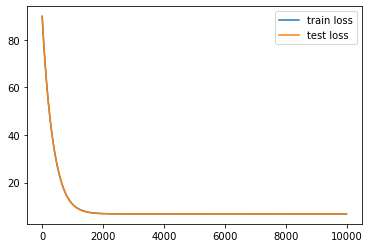

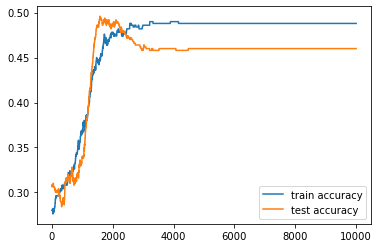

In [8]:
plt.plot(train, label='train loss')
plt.plot(test,  label='test loss' )
plt.legend()
plt.show()

plt.plot(accuracy_train, label='train accuracy')
plt.plot(accuracy_test,  label='test accuracy' )
plt.legend()
plt.show()